In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib2
plt.style.use('ggplot')


In [2]:
data = pd.read_csv('countytable.csv', index_col=0 )

In [3]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,trumpp
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,0.754018
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,0.798123
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,27.0,0,0,188337,6334,0,8,884.88,31.0,0.528359
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,0.0,0,0,124707,5804,10757,19,622.58,36.8,0.782270
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,23.2,341544,0,319700,5622,20941,3,644.78,88.9,0.913855


In [4]:
data.rename(columns={'PST045214': 'Population'}, inplace=True)

In [5]:
data.rename(columns={'AGE295214': 'Population18'}, inplace=True)

In [6]:
data.rename(columns={'AGE775214': 'Senior'}, inplace=True)

In [7]:
data.rename(columns={'SEX255214': 'Female'}, inplace=True)

In [8]:
data.rename(columns={'RHI125214': 'White'}, inplace=True)

In [9]:
data.rename(columns={'RHI225214': 'Black'}, inplace=True)

In [10]:
data.rename(columns={'RHI425214': 'Asian'}, inplace=True)

In [11]:
data.rename(columns={'POP645213': 'Foreign'}, inplace=True)

In [12]:
data.rename(columns={'EDU685213': 'Bachelor'}, inplace=True)

In [13]:
data.rename(columns={'RHI725214': 'Latino'}, inplace=True)

In [14]:
data.rename(columns={'RHI625214': 'Mixed'}, inplace=True)

In [15]:
data.rename(columns={'RHI825214': 'WhiteNH'}, inplace=True)

In [16]:
data.rename(columns={'POP060210': 'Density'}, inplace=True)

In [17]:
data.rename(columns={'HSG445213': 'HomeOwners'}, inplace=True)

In [18]:
data.rename(columns={'INC910213': 'Income'}, inplace=True)

In [19]:
data.columns.values

array(['trump', 'clinton', 'processed', 'area_name', 'state_abbreviation',
       'Population', 'PST040210', 'PST120214', 'POP010210', 'AGE135214',
       'Population18', 'Senior', 'Female', 'White', 'Black', 'RHI325214',
       'Asian', 'RHI525214', 'Mixed', 'Latino', 'WhiteNH', 'POP715213',
       'Foreign', 'POP815213', 'EDU635213', 'Bachelor', 'VET605213',
       'LFE305213', 'HSG010214', 'HomeOwners', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'Income', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'Density', 'trumpp'], dtype=object)

In [20]:
data.state_abbreviation.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MT', 'NE', 'NJ',
       'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WA', 'WV'], dtype=object)

In [21]:
data['TElectorate']=data.Population*(1-data.Population18/100)
data['TFemale']=data.TElectorate*data.Female/100
data['TSeniors']=data.TElectorate*data.Senior/100
data['TWhite']=data.TElectorate*data.WhiteNH/100
data['TBlack']=data.TElectorate*data.Black/100
data['TLatino']=data.TElectorate*data.Latino/100
data['TAsian']=data.TElectorate*data.Asian/100
data['TIncome']=data.Population*data.Income/100
data['TBachelor']=data.Population*data.Bachelor/100
data['TArea']=data.LND110210
data['TRacialDiversity'] = data.TElectorate*(1-data.WhiteNH/100)
#Racial Diversity is defined as the percentage of nonwhite voters
data['TForeign'] = data.TElectorate*data.Foreign/100

In [22]:
data['SElectorate']=data['TElectorate']**0.5
data['SFemale']=data.SElectorate*data.Female/100
data['SSeniors']=data.SElectorate*data.Senior/100
data['SWhite']=data.SElectorate*data.WhiteNH/100
data['SBlack']=data.SElectorate*data.Black/100
data['SLatino']=data.SElectorate*data.Latino/100
data['SAsian']=data.SElectorate*data.Asian/100
data['SIncome']=data['TIncome']/data.SElectorate
data['SBachelor']=data['TBachelor']/data.SElectorate
data['SRacialDiversity'] = data.SElectorate*(1-data.WhiteNH/100)
#Squaring Racial Diversity Varaible 
data['SForeign'] = data.SElectorate*data.Foreign/100

In [23]:
data['TDensity']=np.log(data.Density)*data.TElectorate
data['TSize']=np.log(data.Population)*data.TElectorate

In [24]:
data['SDensity']=np.log(data.Density)*data.SElectorate
data['SSize']=np.log(data.Population)*data.SElectorate

In [25]:
data['Strump']=data.trump/data.SElectorate
data['Sclinton']=data.clinton/data.SElectorate

In [26]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,Population,PST040210,PST120214,POP010210,AGE135214,...,SIncome,SBachelor,SRacialDiversity,SForeign,TDensity,TSize,SDensity,SSize,Strump,Sclinton
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,66866.303674,56.876226,49.667913,3.256912,187272.214574,4.525682e+05,919.998807,2223.299555,88.967701,29.023809
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,135746.661102,140.483543,67.077088,14.204560,738178.740296,1.900405e+06,1870.838306,4816.382515,184.453445,46.655722
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,31086.109701,24.752146,77.727650,4.221165,72755.735806,2.160942e+05,499.842241,1484.597856,37.311742,33.306449
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,29414.281394,20.423068,34.001876,1.600088,64104.814258,1.781803e+05,480.759576,1336.278702,50.494713,14.054224
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,56978.632505,33.258150,25.619220,9.029725,197887.241003,4.834539e+05,942.348872,2302.231692,108.612829,10.238407


In [27]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'Population18', u'Senior', u'Female', u'White', u'Black', u'RHI325214',
       u'Asian', u'RHI525214', u'Mixed', u'Latino', u'WhiteNH', u'POP715213',
       u'Foreign', u'POP815213', u'EDU635213', u'Bachelor', u'VET605213',
       u'LFE305213', u'HSG010214', u'HomeOwners', u'HSG096213', u'HSG495213',
       u'HSD410213', u'HSD310213', u'Income', u'INC110213', u'PVY020213',
       u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213', u'SBO001207',
       u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207', u'SBO415207',
       u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207', u'RTN131207',
       u'AFN120207', u'BPS030214', u'LND110210', u'Density', u'trumpp',
       u'TElectorate', u'TFemale', u'TSeniors', u'TWhite', u'TBlack',
       u'TLatino', u'TAsian', u'TIncome', u'TBachelor', u'TArea',
       u'TRacialDiv

In [28]:
lm0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()

In [29]:
lm0.rsquared

0.8902122532409068

In [30]:
def singleFactorAnalysis(factor):
    lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
    lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
    lmT = smf.ols(formula='Strump ~ SElectorate + ' + factor +' -1', data = data).fit()
    lmC = smf.ols(formula='Sclinton ~ SElectorate + ' + factor +' -1', data = data).fit()
    R2T=1-(1-lmT.rsquared)/(1-lmT0.rsquared)
    R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
    return [R2T, R2C]

In [31]:
singleFactorAnalysis('SWhite')

[0.22931754177733599, 0.034002251671160888]

In [32]:
singleFactorAnalysis('SBlack')

[0.011336077696619817, 0.078504171653229871]

In [33]:
singleFactorAnalysis('SLatino')

[0.21472458532444216, 0.081301351016036305]

In [34]:
singleFactorAnalysis('SSize')

[0.13552314515697672, 0.0076372366252546176]

In [35]:
singleFactorAnalysis('SFemale')

[0.0014275605127226365, 0.052320513253841905]

In [36]:
singleFactorAnalysis('SSeniors')

[0.091021663849851331, 0.0072777884350281319]

In [37]:
singleFactorAnalysis('SIncome')

[0.011019157485152253, 0.0033128042567523996]

In [38]:
singleFactorAnalysis('SBachelor')

[0.00044924324338657673, 0.016497196366543787]

In [39]:
singleFactorAnalysis('SDensity')

[0.023504482051504572, 0.00014452966271072398]

In [40]:
singleFactorAnalysis('SRacialDiversity')

[0.22931754177733599, 0.034002251671160888]

In [41]:
singleFactorAnalysis('SForeign')

[0.11202994363499064, 0.089443540280229494]

In [42]:
# lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
# lmT = smf.ols(formula='Strump ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
# R2T=1-(1-lmT.rsquared)/(1-lm0.rsquared)
# lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
# lmC = smf.ols(formula='Sclinton ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
# R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
# print [R2T, R2C]

In [43]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT1 = smf.ols(formula='Strump ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data=data).fit()
R2T=1-(1-lmT1.rsquared)/(1-lm0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[-0.54621717362776279, -0.35751901837303546]


In [44]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT1 = smf.ols(formula='Strump ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data=data).fit()
R2T=1-(1-lmT1.rsquared)/(1-lmT0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[-0.54621717362776279, -0.35751901837303546]


In [45]:
def addFactorAnalysis(previos,factor):
    lmP = smf.ols(formula='Strump ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Strump ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [46]:
addFactorAnalysis('SElectorate','SIncome');

R2 = 0.0110, p-value=6.446414e-08, estimate=[7.730090e-05 1.649018e-04]


In [47]:
addFactorAnalysis('SElectorate + SIncome','SBachelor');

R2 = 0.0498, p-value=3.634641e-31, estimate=[-3.793786e-01 -2.709585e-01]


In [48]:
addFactorAnalysis('SElectorate + SIncome + SBachelor + SDensity', 'SRacialDiversity')

R2 = 0.1974, p-value=5.096338e-128, estimate=[-2.419319e-01 -2.073295e-01]


[[-0.24193188253489895, -0.20732947029457238],
 5.0963375218419439e-128,
 0.19741897292237676]

In [49]:
addFactorAnalysis('SElectorate + SIncome + SBachelor ', 'SRacialDiversity')

R2 = 0.2175, p-value=1.385165e-142, estimate=[-2.200074e-01 -1.902844e-01]


[[-0.22000740636492522, -0.190284416700429],
 1.3851653657709554e-142,
 0.21749040664879737]

In [50]:
addFactorAnalysis('SElectorate + SIncome + SBachelor + SRacialDiversity ','SForeign')

R2 = 0.0000, p-value=9.796680e-01, estimate=[-5.105907e-02 4.974876e-02]


[[-0.051059070071195721, 0.049748756648825838],
 0.97966798680187284,
 2.4653375996219751e-07]

In [51]:
lm_ = smf.ols(formula='SElectorate ~ SIncome + SBachelor + SRacialDiversity + SForeign + SDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:            SElectorate   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.871e+04
Date:                Wed, 14 Dec 2016   Prob (F-statistic):               0.00
Time:                        16:28:32   Log-Likelihood:                -12862.
No. Observations:                2640   AIC:                         2.574e+04
Df Residuals:                    2634   BIC:                         2.577e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           50.5030      1.002  

In [52]:
for s in [u'SIncome',
       u'SBachelor', u'SRacialDiversity', u'SForeign', u'TDensity']:
    data[s + '_norm'] = data[s] / data[s].mean()

In [53]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,Population,PST040210,PST120214,POP010210,AGE135214,...,SDensity,SSize,Strump,Sclinton,X,SIncome_norm,SBachelor_norm,SRacialDiversity_norm,SForeign_norm,TDensity_norm
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,919.998807,2223.299555,88.967701,29.023809,-10.064153,1.042057,0.949301,0.882566,0.220220,0.406954
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,1870.838306,4816.382515,184.453445,46.655722,-2.238515,2.115500,2.344761,1.191916,0.960459,1.604106
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,499.842241,1484.597856,37.311742,33.306449,-15.586054,0.484452,0.413129,1.381169,0.285419,0.158103
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,480.759576,1336.278702,50.494713,14.054224,-2.440897,0.458397,0.340874,0.604191,0.108192,0.139304
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,942.348872,2302.231692,108.612829,10.238407,9.521413,0.887965,0.555100,0.455237,0.610556,0.430021


In [54]:
lm_ = smf.ols(formula='trumpp ~ SBachelor_norm + SIncome_norm + SRacialDiversity_norm ' +
              '+ SForeign_norm + TDensity_norm', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     45.37
Date:                Wed, 14 Dec 2016   Prob (F-statistic):           4.57e-45
Time:                        16:28:33   Log-Likelihood:                 716.66
No. Observations:                2640   AIC:                            -1421.
Df Residuals:                    2634   BIC:                            -1386.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.68

*** step 3

In [55]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SIncome'); #!!!!

R2 = 0.0201, p-value=2.632620e-13, estimate=[1.053654e-04 1.820423e-04]


In [56]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBachelor');

R2 = 0.0016, p-value=3.729325e-02, estimate=[1.581952e-03 5.213206e-02]


In [57]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBlack');

R2 = 0.0003, p-value=4.024792e-01, estimate=[-6.174282e-02 2.479084e-02]


In [58]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SFemale');

R2 = 0.0049, p-value=3.261596e-04, estimate=[2.237080e-01 7.594876e-01]


In [59]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SDensity');

R2 = 0.0070, p-value=1.781980e-05, estimate=[2.843296e-03 7.613341e-03]


In [60]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SSize');

R2 = 0.0063, p-value=4.646210e-05, estimate=[-7.845629e-03 -2.751867e-03]


***step 4 *****

In [61]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome','SBachelor'); #!!!!

R2 = 0.0266, p-value=3.385761e-17, estimate=[-2.603984e-01 -1.626870e-01]


In [62]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome ', 'SSize');

R2 = 0.0282, p-value=3.817421e-18, estimate=[-1.546747e-02 -9.802783e-03]


In [63]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SBachelor');

R2 = 0.0148, p-value=3.695754e-10, estimate=[-2.129300e-01 -1.117267e-01]


In [64]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SSeniors');

R2 = 0.0203, p-value=1.916950e-13, estimate=[2.498316e-01 4.301947e-01]


In [65]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SFemale');

R2 = 0.0114, p-value=4.017374e-08, estimate=[4.884500e-01 1.028733e+00]


In [66]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0216, p-value=3.523742e-14, estimate=[-1.462950e-02 -8.641034e-03]


In [67]:
def addFactorAnalysisC(previos,factor):
    lmP = smf.ols(formula='Sclinton ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Sclinton ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [68]:
addFactorAnalysisC('SElectorate ', 'SSize');

R2 = 0.0076, p-value=6.900844e-06, estimate=[-7.662697e-03 -3.015620e-03]


In [69]:
addFactorAnalysisC('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0029, p-value=5.803521e-03, estimate=[-8.290389e-03 -1.404742e-03]


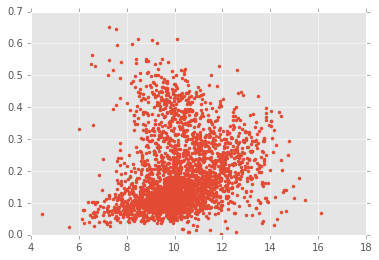

In [70]:
plt.plot(data.SSize/data.SElectorate,data.Sclinton/data.SElectorate,'.')

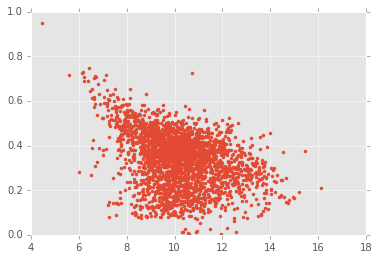

In [71]:
plt.plot(data.SSize/data.SElectorate,data.Strump/data.SElectorate,'.')

In [72]:
lmTrump = smf.ols(formula='Strump ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resTrump = data.Strump - lmTrump.predict()

In [73]:
lmClinton = smf.ols(formula='Sclinton ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resClinton = data.Sclinton - lmClinton.predict()

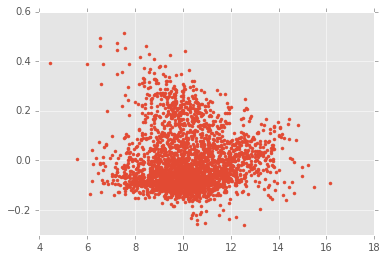

In [74]:
plt.plot(data.SSize/data.SElectorate,resClinton/data.SElectorate,'.')

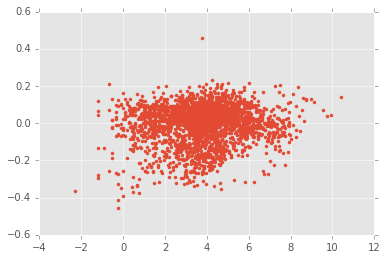

In [75]:
plt.plot(data.SDensity/data.SElectorate,resTrump/data.SElectorate,'.')

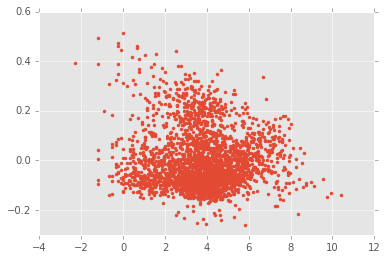

In [76]:
plt.plot(data.SDensity/data.SElectorate,resClinton/data.SElectorate,'.')

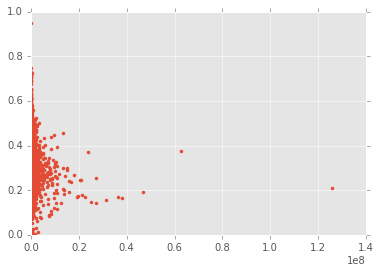

In [77]:
plt.plot(data.TSize,data.trump/data.TElectorate,'.')

In [78]:
ind=(data.Population<1e4)&(data.Population>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6807789237537512

In [79]:
ind=(data.Population<1e3)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.7988649066987703

In [80]:
ind=(data.Population<1e5)&(data.Population>1e4)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6234965717197312

In [81]:
ind=(data.Population<1e7)&(data.Population>1e5)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5492493444489315

In [82]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6141529737655815

In [83]:
ind=(data.Density<1e3)&(data.Population>1e2)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5833182847324875

In [84]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5391731233985939

In [85]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.19143366636014095

In [86]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21322817740492547

In [87]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21518141193793403

In [88]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(sum(data.TLatino[ind]))/sum(data.TElectorate[ind])

0.16025357987793523

In [89]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.11485779576686408

In [90]:
ind=(data.Density<1e4)&(data.Population>1e3)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.17836676856992692

In [91]:
addFactorAnalysis('TElectorate','TDensity');

R2 = 0.1351, p-value=3.097192e-85, estimate=[-8.793852e-05 -7.244508e-05]


In [92]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.TDensity[ind])/sum(data.TElectorate[ind])

3.6732543252525525

In [93]:
singleFactorAnalysis('TDensity')

[0.069083116054926896, 0.059871395032437102]

In [94]:
lm_ = smf.ols(formula='trumpp ~ SDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     72.22
Date:                Wed, 14 Dec 2016   Prob (F-statistic):           3.17e-17
Time:                        16:28:36   Log-Likelihood:                 643.26
No. Observations:                2640   AIC:                            -1283.
Df Residuals:                    2638   BIC:                            -1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6611      0.004    148.564      0.0

In [95]:
lm_ = smf.ols(formula='trump ~ TDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                  trump   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.692e+04
Date:                Wed, 14 Dec 2016   Prob (F-statistic):               0.00
Time:                        16:28:36   Log-Likelihood:                -29685.
No. Observations:                2640   AIC:                         5.937e+04
Df Residuals:                    2638   BIC:                         5.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6504.6446    370.460     17.558      0.0

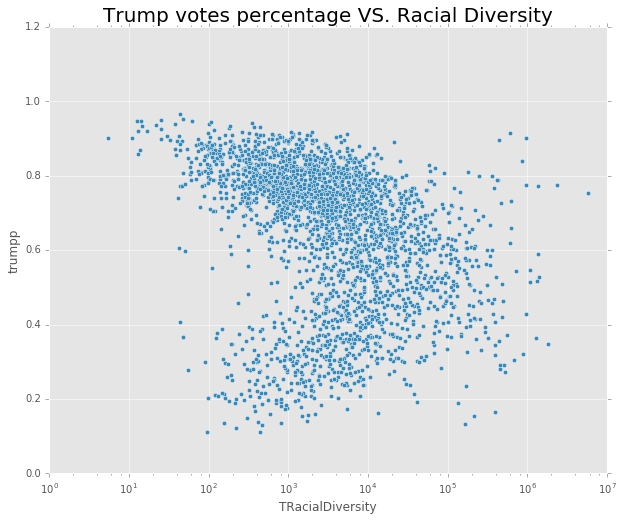

In [96]:
data.plot(x='TRacialDiversity', y = 'trumpp', kind='scatter', logx=True, figsize=(10,8))
plt.title('Trump votes percentage VS. Racial Diversity', fontsize=20)
plt.show()

In [97]:
from sklearn.ensemble import RandomForestClassifier

[ 0.19617247  0.19970243  0.20399702  0.19993482  0.20019327]


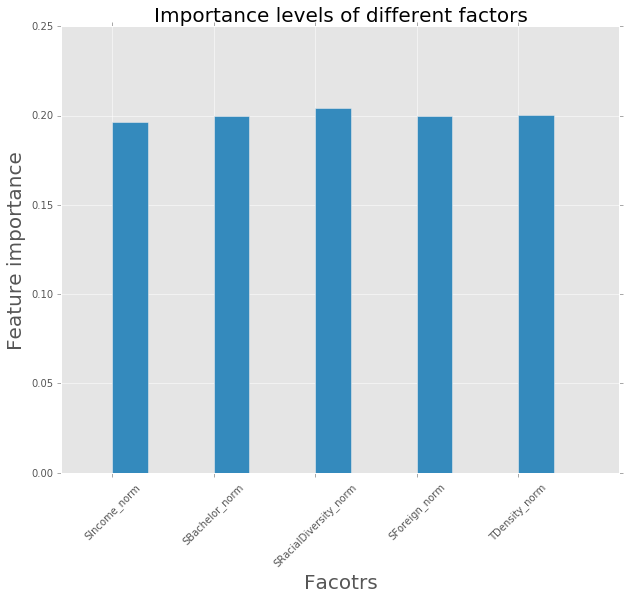

In [98]:
col = ['SIncome_norm', 'SBachelor_norm', 'SRacialDiversity_norm', 'SForeign_norm', 'TDensity_norm']
data_new = data[col]
data_new = data_new.dropna()

clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trumpp)
print model.feature_importances_

array_a = list(np.arange(len(data_new.columns)))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_title('Importance levels of different factors', fontsize=20)
ax.set_xlim(-0.5, len(array_a))
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)
plt.show()

[ 0.1254027   0.1255623   0.12631912  0.12653844  0.12573067  0.12278538
  0.12295611  0.12470529]


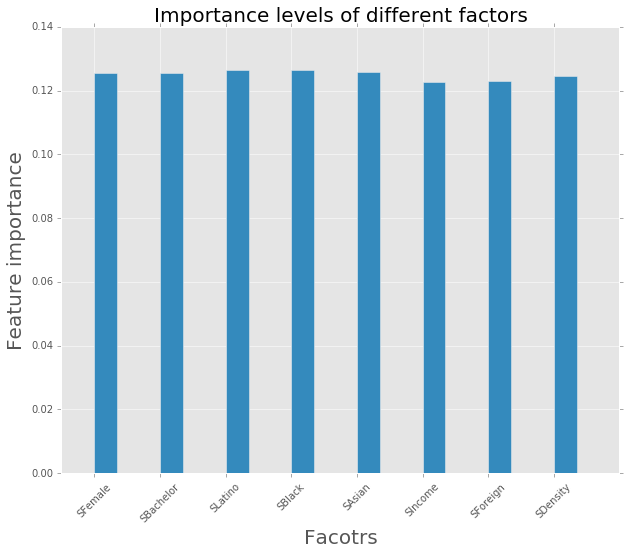

In [99]:
col = ['SFemale', 'SBachelor','SLatino','SBlack', 'SAsian',\
                 'SIncome', 'SForeign', 'SDensity']
data_new = data[col]
data_new = data_new.dropna()

clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.Strump)
print model.feature_importances_

array_a = list(np.arange(len(data_new.columns)))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_title('Importance levels of different factors', fontsize=20)
ax.set_xlim(-0.5, len(array_a))
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)
plt.show()

[ 0.09531401  0.09994965  0.10293737  0.10164109  0.10202415  0.09644638
  0.10050226  0.10473621  0.09670857  0.09974032]


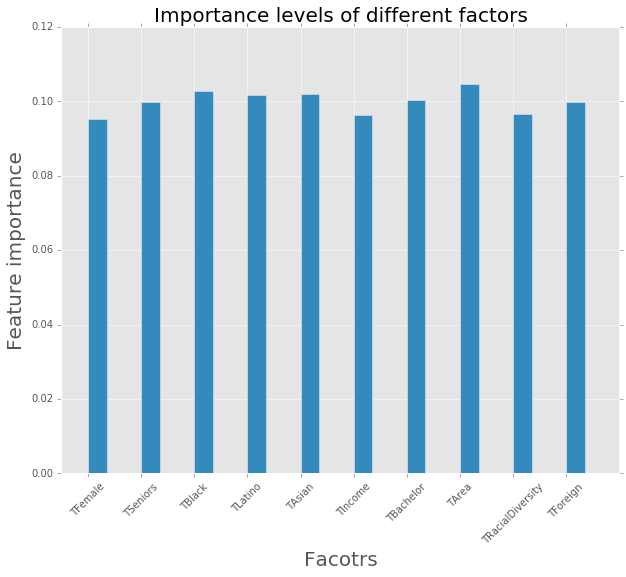

In [100]:
col = ['TFemale', 'TSeniors', 'TBlack', 'TLatino', 'TAsian',\
                 'TIncome', 'TBachelor', 'TArea', 'TRacialDiversity', 'TForeign']
data_new = data[col]
data_new = data_new.dropna()

clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
print model.feature_importances_

array_a = list(np.arange(len(data_new.columns)))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_title('Importance levels of different factors', fontsize=20)
ax.set_xlim(-0.5, len(array_a))
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)
plt.show()

[ 0.09787074  0.10475857  0.10294746  0.09765456  0.09865537  0.08055773
  0.10976758  0.10350301  0.10731763  0.09696735]


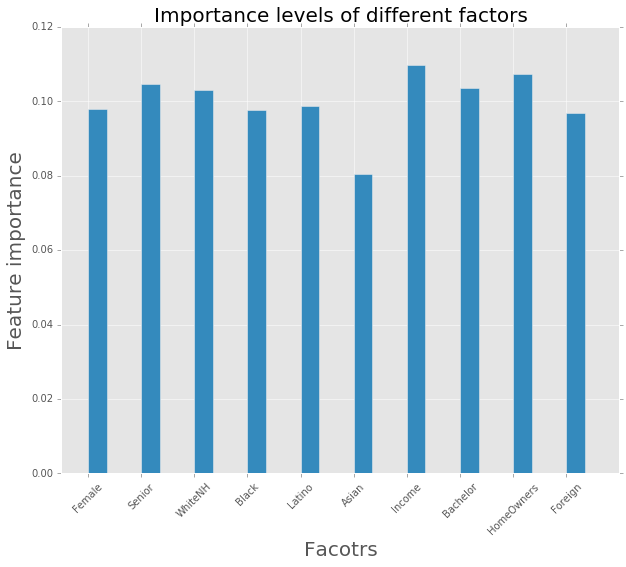

In [101]:
col = ['Female', 'Senior', 'WhiteNH', 'Black', 'Latino', 'Asian', 'Income', 'Bachelor', 'HomeOwners', 'Foreign']
data_new = data[col]
data_new = data_new.dropna()

clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
print model.feature_importances_

array_a = list(np.arange(len(data_new.columns)))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_title('Importance levels of different factors', fontsize=20)
ax.set_xlim(-0.5, len(array_a))
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)
plt.show()

[ 0.01725818  0.01747982  0.02503417  0.01649723  0.02154847  0.02266049
  0.02288601  0.02404674  0.02245098  0.02072107  0.01885012  0.01799267
  0.01114446  0.02128976  0.02293998  0.02219797  0.02529949  0.02044028
  0.02201346  0.0228907   0.02285807  0.01996314  0.02592185  0.0178295
  0.0237834   0.02386921  0.02366013  0.01768922  0.02252393  0.02318365
  0.02207245  0.02237046  0.01807019  0.01923945  0.02765333  0.01822814
  0.01813929  0.0093468   0.00761628  0.00790045  0.00132739  0.00908377
  0.01884231  0.0162022   0.01846653  0.01889283  0.02528839  0.01824264
  0.01982808  0.02524308  0.0210218 ]


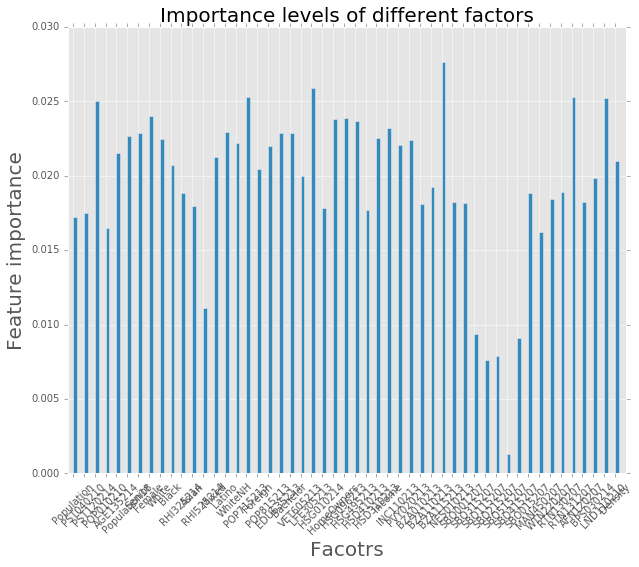

In [102]:
col = ['Population', 'PST040210', 'PST120214', 'POP010210', 'AGE135214',
       'Population18', 'Senior', 'Female', 'White', 'Black',
       'RHI325214', 'Asian', 'RHI525214', 'Mixed', 'Latino',
       'WhiteNH', 'POP715213', 'Foreign', 'POP815213', 'EDU635213',
       'Bachelor', 'VET605213', 'LFE305213', 'HSG010214', 'HomeOwners',
       'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'Income',
       'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213',
       'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207',
       'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207',
       'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210',
       'Density']
data_new = data[col]
data_new = data_new.dropna()

clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
print model.feature_importances_

array_a = list(np.arange(len(data_new.columns)))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_title('Importance levels of different factors', fontsize=20)
ax.set_xlim(-0.5, len(array_a))
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)
plt.show()

In [103]:
ind = model.feature_importances_.argsort()[-4:][::-1]

factors = []
for i in ind:
    factors.append(col[i])

factors

['BZA115213', 'LFE305213', 'POP715213', 'RTN131207']

In [104]:
data.rename(columns={'BZA115213': 'PrivateEmployPerChange'}, inplace=True)

data.rename(columns={'LFE305213': 'MeanTravelTimeToWork'}, inplace=True)

data.rename(columns={'POP715213': 'LiveSameHouseOneYearPerc'}, inplace=True)

data.rename(columns={'RTN131207': 'RetailSalesPerCapita'}, inplace=True)